In [1]:
import numpy as np
from matplotlib import cm 
import matplotlib.pyplot as plt
from scipy.ndimage import label

from util.zonotope import Zonotope

In [7]:
h = 5  # height
w = 10 # width
pobs = 0.25  # rough percent of space (by area) that have obstacles

# initialize random values
grid = np.random.uniform(low=0.0,high=1.0,size=(h,w))
# threshold based on obstacle percentage
grid = np.where(grid < pobs, 1.0, 0.0)



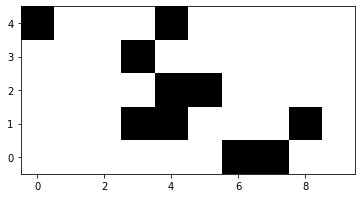

In [8]:
# plot the grid
plt.imshow(grid,cmap= cm.get_cmap('gray').reversed())
plt.gca().invert_yaxis()
plt.show()

In [9]:
labels, numL = label(grid)
label_indices = [(labels == i).nonzero() for i in range(1, numL+1)]

In [10]:
zonos = []
for obs in label_indices:
    minx = min(obs[0])
    maxx = max(obs[0]) + 1
    cx = (maxx-minx)/2. + minx
    miny = min(obs[1])
    maxy = max(obs[1]) + 1
    cy = (maxy-miny)/2. + miny

    c = np.array([[cy],
                  [cx]])
    g = np.array([[maxy-cy,0.0],
                  [0.0,maxx-cx]])
    zono = Zonotope(c,g)
    zonos.append(zono)
    

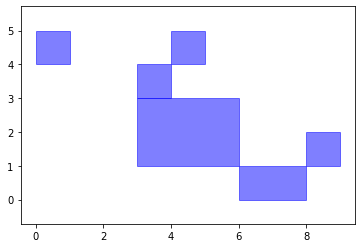

In [11]:
fig, ax = plt.subplots()
for zono in zonos:
    zono.plot(ax)

ax.axis('equal')
plt.show()
    